In [1]:
from platform import python_version

print(python_version())


3.8.5


In [2]:
pip install tqdm

You should consider upgrading via the '/home/darrenyeo/python/python/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from tqdm.notebook import tqdm

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from scipy import constants

In [7]:
#Global variables
L = 10 #unit:nm length of the box
N = 100#100 #unit:numbers
m = 39.948 # unit: a.m.u
T = 100 #unit:kelvin
KB = constants.R*10**-3  #unit KJ/mol.K
dt = 10**-3 #unit:ps
n_steps =1000 #unitness
epsilon = 1
sigma = 0.34

In [93]:
KB

0.008314462618

In [8]:
def write_file(FILE1, coords, n_iter):
    
    '''
    
    This function is used to save obtained coordinates into the PyMol readable format PDB.
    It also writes several other interesting stuff to plain .txt files.
    
    FILE1 := Coordinaten File Name (Should end with .pdb)
    n_iter := Number of step
    
    '''


    #Coordinates are round to the second decimal position to faciliate saving
    round_ = 2

    #Write head for each frame   
    FILE1.write('MODEL {}\n'.format(n_iter)) #Start of a frame
    N = coords.shape[0] #Get number of atoms
    
    
    #Just iterate over all coordinates and write them down line per line
    for i in range(N):
        
        #The PDB-formate is really strict the line below is from: https://cupnet.net/pdb-format/
 
        #ATOM  #ID   #NAME     #RESN      #RESID          #X    #Y     #Z
        coord_str = "{:6s}{:5d} {:^4s}{:1s}{:3s} {:1s}{:4d}{:1s}   {:8.3f}{:8.3f}{:8.3f}{:6.2f}{:6.2f}          {:>2s}{:2s}\n".format('ATOM', int(i),
                                                                                                                         'PAR', ' ', 'ARG',
                                                                                                                         ' ', int(i), ' ',
                                                                                                                         np.round(coords[i][0], round_)*10,
                                                                                                                         np.round(coords[i][1], round_)*10,
                                                                                                                         np.round(coords[i][2], round_)*10,
                                                                                                                          1.0, 1.0, 'Ar', ' ')
 
 
        FILE1.write(coord_str) #Write coordinates
    FILE1.write('TER\nENDMDL\n') #End of a frame

# Initializing positions and velocity in box for N = 100.

In [127]:
def init_pos():
    """initialize position of atoms within L in x, y, z coordinates where L = 10
    Border and grid set to be "smaller" than the box size where L = 10 """
    scale = pressure_coupling()
    coord =[]
    border= 4*sigma # no atoms will generate that are <4*sigma
    Grid = L-border # no atoms will generate that are > L-(4*sigma)
    for i in range(N):
        coordinates = [np.random.choice(np.arange(border,Grid,0.1)), np.random.choice(np.arange(border,Grid,0.1)), np.random.choice(np.arange(border,Grid,0.1))]
        coord.append(coordinates)
        
    for i in np.array(coord):
        for k in range(3):
            scaled_coord =np.array(coord[i,k]) *scale #ERROR WHY???
    
    return np.array(scaled_coord)


#return x, y, z # pos.shape =(Nx3)
#keine Überlappung, Teilchen in der Box

In [105]:
pressure_coupling()

0.992593793179033

# Test for scaling 

In [10]:
#def init_pos():
#    """initialize position of atoms within L in x, y, z coordinates where L = 2
#    Border and grid set to be "smaller" than the box size where L = 2 """
#    coord =[]
#    border= 2*sigma # no atoms will generate that are <2*sigma
#    Grid = L-border # no atoms will generate that are > L-(2*sigma)
#    for i in range(N):
#        coordinates = [np.random.choice(np.arange(border,Grid,0.1)), np.random.choice(np.arange(border,Grid,0.1)), np.random.choice(np.arange(border,Grid,0.1))]
#        coord.append(coordinates)
    
#    return np.array(coord)

In [129]:
initpos=init_pos()
initpos

TypeError: list indices must be integers or slices, not tuple

In [14]:
def init_vel(V):
    """initialize random velocities of the atoms"""
    velocity = np.random.normal(0, np.sqrt(KB*T/m),(V,3))
    
    return velocity

#vel.shape =(Nx3)
#zufällig verteilt

# Day 2

In [138]:
#vel = init_vel(1000)
#vel

In [15]:
np.sqrt(np.sum(vel**2, 1))

NameError: name 'vel' is not defined

In [17]:
def initialization():
    pos=init_pos()
    vel=init_vel
    file_name=open("tmp.pdb", "w")
    write_file(file_name, pos, 1)# change 1 to n_iter

In [18]:
def hist_plot(file_name, vels):
    fig, ax = plt.subplots(2,2)
    y_axes = ['Freq', 'Freq', 'Freq', 'Prob density']
    x_axes = ['Vx', 'Vy', 'Vz', 'V']
    title =['Hist Vx', 'Hist Vy', 'Hist Vz', 'Maxwell boltzman distribution']
    c=0
    for i in range(2):
        for j in range(2):
            if c !=3:
                
                ax[i,j].hist(vels[:,c], bins =20, density=True)
                ax[i,j].set_title(title[c])
                ax[i,j].set_xlabel(x_axes[c])
                ax[i,j].set_ylabel(y_axes[c])
            else:
                ax[i,j].hist(np.sqrt(np.sum(vel**2, 1)), bins =20, density=True)
                ax[i,j].set_title(title[c])
                ax[i,j].set_xlabel(x_axes[c])
                ax[i,j].set_ylabel(y_axes[c])
                    
            c+=1
    plt.tight_layout()
            
        


In [19]:
hist_plot("str", vel)

NameError: name 'vel' is not defined

# Test atoms for algorithms

In [20]:
def test_pos():
    """For testing of the different boundaries"""
    pos = np.array([[1,5,5], [9,5,5]])
    
    return pos

In [21]:
def test_vel():
    """For testing of the different boundaries"""
    vel = np.array([[0,0,0], [0,0,0]])
    
    return vel


# Defining Boundaries and initialization of force

In [22]:
def no_bounds(pos, vel):
    """initialisation for wall potential"""
    return pos, vel

In [23]:
def compute_force(pos): # initialised to zero at the beginning of the simulation-- will increase later
    """set forces to 0"""
    pos = np.zeros((N,3))
    return np.zeros(pos.shape)


In [24]:
def pbc(pos, vel): #velocity here does not change, wrote it this way to accomodate Angle function(change in velocity)
    """Periodic boundary conditions, ensures that any atoms that move out of the box are placed back into the box again"""
    for i in range(N):
        for j in range(3):
            if pos[i,j]<0:
                pos[i,j] = L+pos[i,j] #pos[i,j] is negative, hence sign should be + so that pos[i,j] <L                
                
            elif pos[i,j]>L:
                pos[i,j] = pos[i,j]-L
                
    return pos, vel

In [ ]:
def pbc(pos, vel): 
    pos = np.where(pos>0, pos ,L+pos) #for all positions of atoms bigger than 0, stay as it is. otherwise plus L to be in the box 
    pos = np.where(pos<L, pos, pos-L) #for all positions of atoms smaller than L, stay as it is. otherwise minus L to be in the box
    
    return pos

In [25]:
def Angle(pos, vel):
    """Boundary where particles bounces off the wall at an angle"""
    for i in range(N):
        for j in range(3):
            if pos[i,j]<0:
                pos[i,j] = pos[i,j]*(-1) #When particles in x, y, z coodrinates outside of the "box", pos<0. angle reflection has to be same
                vel[i,j]=  vel[i,j]*(-1)
                
            elif pos[i,j]>L:
                pos[i,j] = 2*L-pos[i,j] #When particles in x, y, z coodrinates outside of the "box", pos>L. angle reflection has to be same
                vel[i,j]=  vel[i,j]*(-1)
                
    return pos, vel

In [21]:
def Angle(pos, vel):
    pos=np.where(pos>0, pos, pos*(-1))
    

In [26]:
def wall_force(pos):
    """Wall potential repulsion (F) according to lennard jones potential, only the repulsion part of the equation is taken into accound"""
    
    force = np.zeros((N,3))
    for i in range(N):
        for j in range(3):
            if pos[i,j]<(4*sigma):
                force[i,j] = 48*(epsilon/sigma)*((sigma/(np.absolute(pos[i,j]))**13))
                
                
                
            elif pos[i,j]>(L-(4*sigma)):
                force[i,j] = -48*(epsilon/sigma)*((sigma/(L-pos[i,j]))**13) #- sign, because the force needs to be in the negative direction as it repels from the right side of the box
                
                
    return force   

# Temperature and pressure coupling

In [77]:
def temp(vel):
    """Returns the current temperature of the system"""
    KE = e_kin(vel)
    temp = (2*KE)/(3*N*KB)
    
    return temp

In [82]:
def berendsen_temp(vel):
    """Berendsen thermostat"""
    tau = 0.1 #ps, tau referenced online for 0.1-0.4 ps for dt of 1fs(femtosecond)
    temp_new = temp(vel)
    scale = np.sqrt(1+(dt/tau)*(T/temp_new-1))
    
    
    return scale 

In [88]:
def pressure():
    """Ideal gas law"""
    P=(N*KB*T)/L**3
    
    return P

In [95]:
def pressure_coupling():
    """Berendsen Barostat"""
    taup = 5
    P0 = 1
    P = pressure()
    scale = (1 - 1/ KB* dt / taup * (P0 - P) )**(1./3)
    
    return scale

0.08314462618

# Algorithms

In [31]:
def Euler(pos, vel, boundary):
    """Euler algorithm, kraft frei"""
    pos_new = pos+ vel*dt
    pos_new, vel_new =boundary(pos_new, vel)       
        
    
    
    return pos_new

In [32]:
def Verlet(pos, pos_old, vel, force, boundary):
    """Verlet algorithm"""
    force = Interacting_atoms(pos) 
    #force = force + wall_force(pos) #+In order to implement wall potential
    pos_new = 2*pos - pos_old + force/m * dt**2
    vel = ((pos_new  - pos_old)/2*dt)
    pos_new, vel_new =boundary(pos_new, vel)
    
    return pos_new, pos, vel_new

In [26]:
#def Velocity_verlet(pos, vel, boundary):
 #   """Initial Velocity Verlet for pbc and angle reflection"""
 #   force = Force(pos)
 #   pos_new = pos + vel*dt + (force/(2*m))*dt**2 
 #   force_new = Force(pos_new)
 #   vel_new = vel + ((force_new + force)/(2*m))*dt
 #   pos_new =boundary(pos_new)
    
 #   return pos_new, vel_new

In [33]:
def Velocity_verlet(pos, vel, boundary):
    """Velocity Verlet to run with Wall boundary repulsion according to lennard jones potential.
    Only repulsion is taken into account. Interaction of atoms according to LJ included"""
    #force = compute_force(pos) + wall_force(pos) #when computing forces
    force = Interacting_atoms(pos) 
    pos_new = pos + vel*dt + (force/(2*m))*dt**2  # Veleocity verlet algorithm for position
    #force_new = compute_force(pos_new) + wall_force(pos_new)
    force_new = Interacting_atoms(pos_new)
    vel_new = vel + ((force_new + force)/(2*m))*dt # Veleocity verlet algorithm for velocity
    pos_new, vel_new =boundary(pos_new, vel_new)
    
    return pos_new, vel_new

In [26]:
#def Leapfrog(pos, vel, boundary):
#    """Leapfrog algorithm"""
#    force = Interacting_atoms(pos) #when computing forces, this will not be correct
#    #force = compute_force(pos) + wall_force(pos) # in order to implement wall_force repulsion   
#    vel_new = vel + dt*(force/m)
#    pos_new = pos + dt*vel_new
#    pos_new, vel_new =boundary(pos_new, vel_new)
    #print(force)
    
#    return pos_new, vel_new


In [84]:
def Leapfrog(pos, vel, boundary):
    """Leapfrog algorithm"""
    force = Interacting_atoms(pos) #when computing forces, this will not be correct
    #force = compute_force(pos) + wall_force(pos) # in order to implement wall_force repulsion   
    
    scale = berendsen_temp(vel) #Scale value for berendsen thermostat
    
    
    vel_new = vel + dt*(force/m)
    vel_new2 = scale*vel_new #scale value taken into account
    pos_new = pos + dt*vel_new2
    pos_new, vel_new2 =boundary(pos_new, vel_new2)
    #print(force)
    
    return pos_new, vel_new2


In [35]:
def get_positions(pos1, pos2):
    """Return der direction of r and the absolute value of r (Distance)"""

    r_vector = (pos1 - pos2) # positions in x,y,z coordinates
    
    if r_vector[0] > L/2:
        r_vector[0] = r_vector[0] -L
    elif r_vector[0] < -L/2:
        r_vector[0] = L + r_vector[0]
    
    if r_vector[1] > L/2:
        r_vector[1] = r_vector[1] -L
    elif r_vector[1] < -L/2:
        r_vector[1] = L + r_vector[1]
        
    if r_vector[2] > L/2:
        r_vector[2] = r_vector[2] -L
    elif r_vector[2] < -L/2:
        r_vector[2] = L + r_vector[2]
        
        
    absolute_r = (np.sqrt(r_vector[0]**2 + r_vector[1]**2 +r_vector[2]**2)) #obtain the absolute positions of r 
    
    return r_vector, absolute_r
    

In [ ]:
#def get_positions(pos1, pos2):
#    """Rewritten not tested yet ,Return der direction of r and the absolute value of r (Distance)"""

#    r_vector = (pos1 - pos2) # positions in x,y,z coordinates
    
#    r_vector = np.where(r_vector<L/2, r_vector, r_vector-L)
#    r_vector = np.where(r_vector> -L/2, r_vector, L+r_vector)
    
#    absolute_r = (np.sqrt(r_vector[0]**2 + r_vector[1]**2 +r_vector[2]**2)) #obtain the absolute positions of r 
    
#    return r_vector, absolute_r

# Energy calculation of the system

In [60]:
def e_kin(vel):
    """Return the kinetic enery of the system"""
    vel = init_vel(1000)
    KE = np.sum(1/2*m*vel**2)
    
    return KE

In [37]:
def e_pot(pos):
    """Function that calculate the potential energy according to LJ potential"""
    PE =0
    for i in range(N):
        for j in range(N):
            if i <= j:
                continue
    
            else:
                r_vector, absolute_r = get_positions(pos[i],pos[j])
                
                PE = PE + 4*epsilon*((sigma/absolute_r)**12 - (sigma/absolute_r)**6)
    
    return PE

In [38]:
def total_energy(pos, vel):
    """Total energy of the system from KE and PE"""
    
    TE = np.sum(e_kin(vel) + e_pot(pos))
    
    
    return TE
    

In [39]:
def Interacting_atoms(pos):
    """function that describes interaction between atoms according to LJ potential (Force)"""
    force = np.zeros((N,3))
    for i in range(N): # Loop over all atoms
        for j in range(N): #Loop over all other atoms (interacting atoms)
            if i == j: #Skip self forces
                continue
            else: #sum of all forces where i != to J
            
                
                r_vector, absolute_r = get_positions(pos[i],pos[j]) #calling the get_positions function to calculate force between two atoms (i and j) index representing each atom in i and each atom in 
                
                for k in range(3):
                    force[i,k] += 24*(epsilon/sigma)*(2*((sigma/(absolute_r))**13)-(sigma/(absolute_r))**7)*r_vector[k]/absolute_r#compute force to each particle
                #Force_vector = negative derivative of potential * r_vector/absolute value of r, where r = distance between two atoms
            
    
    return force       

# Neighbor List

In [40]:
def Neighbor_list(pos):
    """omits atoms in the simulation when they are too far away 
    to save computing time. Atoms that too far away are determined by
    the cut off value."""
    Rc = 1  #Cut off value radius of i, units nm
    neighbors=[]
    for i in range(N):
        list_2 =[]
        for j in range(N):
            if i==j: #Skip self forces
                continue
            
            
            else:
                r_vector, absolute_r = get_positions(pos[i],pos[j])
                
                if absolute_r < Rc:
                    list_2.append(j)
        
        neighbors.append(list_2.copy())
    
    return neighbors
                         

# Main function

In [85]:
def main(mode):
    """Run euler algorithm"""
    pos=init_pos()
    vel=init_vel(N)
    #pos=test_pos()
    #vel=test_vel()
    file_name=open("read.pdb", "w")
    file_name.write('CRYST1'+str("{0:9.3f}{0:9.3f}{0:9.3f}").format(L*10,L*10,L*10)+'  90.00  90.00  90.00 P 1           1\n')
    write_file(file_name, pos, 0)
    if mode == 0:
        """Run euler algorithm"""
        for n_iter in range(n_steps):
            pos=Euler(pos, vel, pbc)
            if n_iter%50 ==0:
                write_file(file_name, pos, n_iter)
            KE = e_kin(vel)
            
            
    if mode == 1:
        """Run verlet algorithm"""
        dist_atoms = []
        PE =[]
        KE =[]
        TE =[]
        pos_old = pos
        pos = Euler(pos, vel, pbc)
        for n_iter in tqdm(range(n_steps)):
            force=Interacting_atoms(pos)
            #force=compute_force(pos)
            #force+=wall_force(pos)
            pos, pos_old, vel=Verlet(pos, pos_old, vel, force, pbc)
            #pos, pos_old=Verlet(pos, pos_old, vel, force, no_bounds)
            if n_iter%50 ==0:
                NL = Neighbor_list(pos)
                write_file(file_name, pos, n_iter)
                
            dist_atoms.append(get_positions(pos[0], pos[1])[1])
            PE.append(e_pot(pos))
            KE.append(e_kin(vel))
            TE.append(total_energy(pos, vel))
            
            
            
    if mode == 2:
        """Run verlocity verlet algorithm"""
        dist_atoms = []
        PE =[]
        KE =[]
        TE =[]
        for n_iter in tqdm(range(n_steps)):
            pos, vel = Velocity_verlet(pos, vel, pbc)            
            #pos, vel = Velocity_verlet(pos, vel, no_bounds) #no_bounds to implement wall_force boundary. 
            if n_iter%10 ==0:
                NL = Neighbor_list(pos)
                write_file(file_name, pos, n_iter)
                
                
            dist_atoms.append(get_positions(pos[0], pos[1])[1])
            PE.append(e_pot(pos))
            KE.append(e_kin(vel))
            TE.append(total_energy(pos, vel))
            
            
            
    
    if mode == 3:
        """Run leapfrog algorithm"""
        dist_atoms = []
        PE =[]
        KE =[]
        TE =[]
        Temp =[]
        for n_iter in tqdm(range(n_steps)):
            pos, vel = Leapfrog(pos, vel, pbc)
            #pos, vel = Leapfrog(pos, vel, no_bounds) #to implement wall_force boundary
            if n_iter%10 ==0:
                NL = Neighbor_list(pos)
                write_file(file_name, pos, n_iter)
            

            dist_atoms.append(get_positions(pos[0], pos[1])[1])
            PE.append(e_pot(pos))
            KE.append(e_kin(vel))
            TE.append(total_energy(pos, vel))
            Temp.append(temp(vel))
            
            
            
            

            
            
    file_name.close()
    return dist_atoms, PE, KE, TE, NL, Temp

In [ ]:
initialization()

# Leapfrog

In [99]:
dist_atoms, PE, KE, TE, NL, Temp =main(3)
#main(3)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [100]:
#print(np.array(dist_atoms))
#print(np.array(PE))
#print(np.array(KE))
#print(np.array(TE))
print(np.array(Temp))
#plt.plot(KE)


[1033.26614886 1038.58455152  961.87368059 1012.63720102 1009.42562353
 1011.43125205  997.87338806  972.15707738  982.4275249   961.18417677
 1015.94834258 1029.70613366  996.25812351 1033.78910808 1036.70911746
 1013.7778122  1024.34313615 1004.97326929 1004.11372294  961.58891014
  975.24824315  970.32220262 1012.28750004  999.02787831 1010.88203503
  990.88710894  980.84242893  957.3450754  1007.81899342  957.3800442
 1021.06197457 1029.97183644  988.4202284   975.0967611  1021.06389007
 1011.82764133 1015.49185     995.46436846  973.5747019  1004.77956911
  947.02564491  967.23774407  993.55399565 1001.32497535  993.06613601
  965.11391283 1036.4325761   984.50417902  998.93401577  993.59186559
  984.83543528 1027.02757086 1040.28976709 1012.79437708 1072.84773914
 1014.93760358  957.1806304   982.25545215 1036.32746411  963.36004225
 1011.22171182 1028.38068815  988.88636363 1026.78574645 1007.09775378
  989.9561117   998.4247717  1031.85869478  980.1384633  1003.12833243
  948.1

In [55]:
print(np.array(NL))

[list([33]) list([34, 52]) list([]) list([21]) list([]) list([83])
 list([]) list([]) list([58]) list([78]) list([]) list([24]) list([])
 list([16]) list([]) list([]) list([13, 80]) list([]) list([87])
 list([28]) list([]) list([3, 93]) list([32]) list([]) list([11]) list([])
 list([]) list([]) list([19]) list([44, 89, 98]) list([]) list([])
 list([22]) list([0]) list([1, 52, 97]) list([]) list([]) list([84])
 list([]) list([]) list([]) list([46]) list([]) list([]) list([29, 89])
 list([]) list([41]) list([]) list([88]) list([]) list([]) list([])
 list([1, 34, 97]) list([]) list([86]) list([]) list([]) list([90])
 list([8, 74]) list([]) list([66]) list([]) list([]) list([]) list([])
 list([]) list([60]) list([]) list([71]) list([]) list([]) list([68])
 list([]) list([]) list([58]) list([]) list([]) list([]) list([9])
 list([]) list([16]) list([89]) list([]) list([5]) list([37]) list([])
 list([54]) list([18, 96]) list([48]) list([29, 44, 81, 98])
 list([57, 95]) list([]) list([]) list(

<ipython-input-55-9fb7a1d4abbb>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(NL))


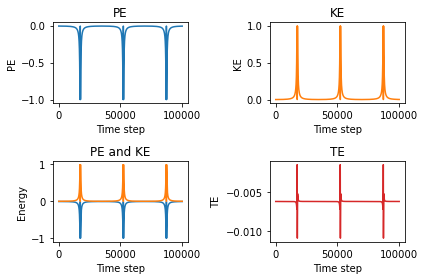

In [259]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(PE)
axs[0, 0].set_title('PE')
axs[0, 0].set_xlabel('Time step')
axs[0, 0].set_ylabel('PE')

axs[0, 1].plot(KE, 'tab:orange')
axs[0, 1].set_title('KE')
axs[0, 1].set_xlabel('Time step')
axs[0, 1].set_ylabel('KE')

axs[1, 0].plot(PE,'tab:blue')
axs[1, 0].plot(KE, 'tab:orange')
axs[1, 0].set_title('PE and KE')
axs[1, 0].set_xlabel('Time step')
axs[1, 0].set_ylabel('Energy')

axs[1, 1].plot(TE, 'tab:red')
axs[1, 1].set_title('TE')
axs[1, 1].set_xlabel('Time step')
axs[1, 1].set_ylabel('TE')

plt.tight_layout()

In [182]:

TE_2





[-0.006169671981265225,
 -0.006169671981265207,
 -0.006169671981265181,
 -0.006169671981265206,
 -0.0061696719812652226,
 -0.006169671981265225,
 -0.00616967198126522,
 -0.006169671981265199,
 -0.006169671981265171,
 -0.006169671981265196,
 -0.0061696719812652095,
 -0.006169671981265211,
 -0.006169671981265204,
 -0.006169671981265183,
 -0.006169671981265152,
 -0.006169671981265175,
 -0.006169671981265188,
 -0.006169671981265188,
 -0.006169671981265178,
 -0.006169671981265155,
 -0.006169671981265124,
 -0.006169671981265144,
 -0.006169671981265157,
 -0.006169671981265154,
 -0.006169671981265144,
 -0.0061696719812651185,
 -0.006169671981265085,
 -0.006169671981265104,
 -0.006169671981265115,
 -0.0061696719812651115,
 -0.006169671981265099,
 -0.0061696719812650725,
 -0.006169671981265038,
 -0.006169671981265054,
 -0.006169671981265064,
 -0.006169671981265059,
 -0.006169671981265045,
 -0.006169671981265016,
 -0.00616967198126498,
 -0.006169671981264996,
 -0.006169671981265003,
 -0.006169671

In [183]:
TE

[-0.006169672015462122,
 -0.006169672049659015,
 -0.0061696720838559016,
 -0.006169672118052786,
 -0.006169672152249728,
 -0.0061696721864466595,
 -0.006169672220643589,
 -0.006169672254840558,
 -0.006169672289037513,
 -0.006169672323234502,
 -0.006169672357431521,
 -0.006169672391628568,
 -0.006169672425825624,
 -0.006169672460022688,
 -0.006169672494219743,
 -0.006169672528416852,
 -0.006169672562613991,
 -0.006169672596811151,
 -0.006169672631008389,
 -0.006169672665205621,
 -0.006169672699402895,
 -0.006169672733600196,
 -0.006169672767797569,
 -0.006169672801994933,
 -0.006169672836192398,
 -0.006169672870389881,
 -0.006169672904587425,
 -0.006169672938785007,
 -0.006169672972982602,
 -0.006169673007180257,
 -0.006169673041378005,
 -0.0061696730755757614,
 -0.006169673109773631,
 -0.006169673143971519,
 -0.006169673178169462,
 -0.006169673212367503,
 -0.006169673246565599,
 -0.0061696732807637305,
 -0.006169673314961926,
 -0.006169673349160218,
 -0.006169673383358582,
 -0.00616967

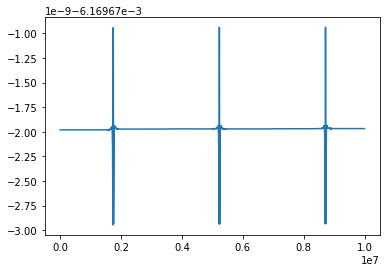

In [179]:
plt.plot(TE_2)


In [109]:
np.min(dist_atoms)

0.3201377670453933

# Velocity Verlet

In [176]:
dist_atoms_2, PE_2, KE_2, TE_2, NL_2=main(2)

100%|██████████| 10000000/10000000 [23:42<00:00, 7029.68it/s]


In [177]:
print(np.array(dist_atoms_2))
print(np.array(PE_2))
print(np.array(KE_2))
print(np.array(TE_2))

[1.         1.         1.         ... 0.97983059 0.97983068 0.97983077]
[-0.00616967 -0.00616967 -0.00616967 ... -0.00697058 -0.00697057
 -0.00697057]
[3.41968964e-15 1.36787586e-14 3.07772067e-14 ... 8.00904923e-04
 8.00901108e-04 8.00897292e-04]
[-0.00616967 -0.00616967 -0.00616967 ... -0.00616967 -0.00616967
 -0.00616967]


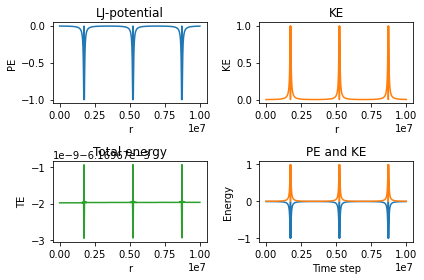

In [178]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(PE_2)
axs[0, 0].set_title('LJ-potential')
axs[0, 0].set_xlabel('r')
axs[0, 0].set_ylabel('PE')

axs[0, 1].plot(KE_2, 'tab:orange')
axs[0, 1].set_title('KE')
axs[0, 1].set_xlabel('r')
axs[0, 1].set_ylabel('KE')

axs[1, 0].plot(TE_2, 'tab:green') # spikes in the total energy at 10^-3 timestep 
axs[1, 0].set_title('Total energy')
axs[1, 0].set_xlabel('r')
axs[1, 0].set_ylabel('TE')

axs[1, 1].plot(PE_2,'tab:blue')
axs[1, 1].plot(KE_2, 'tab:orange')
axs[1, 1].set_title('PE and KE')
axs[1, 1].set_xlabel('Time step')
axs[1, 1].set_ylabel('Energy')

plt.tight_layout()

# Verlet

In [164]:
dist_atoms_1, PE_1, KE_1, TE_1, NL_1 =main(1)

In [166]:
print(np.array(dist_atoms_1))
print(np.array(PE_1))
print(np.array(KE_1))
print(np.array(TE_1))

[1.         0.99999999 0.99999999 ... 0.97981737 0.97982633 0.97983528]
[-0.00616967 -0.00616967 -0.00616967 ... -0.00697114 -0.00697076
 -0.00697038]
[8.54922306e-24 7.69430075e-23 2.13730576e-22 ... 8.01850326e-16
 8.01468522e-16 8.01086833e-16]
[-0.00616967 -0.00616967 -0.00616967 ... -0.00697114 -0.00697076
 -0.00697038]


In [75]:
NL_1

[[1], [0]]

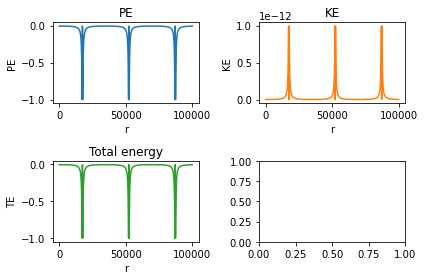

In [167]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(PE_1)
axs[0, 0].set_title('PE')
axs[0, 0].set_xlabel('r')
axs[0, 0].set_ylabel('PE')

axs[0, 1].plot(KE_1, 'tab:orange')
axs[0, 1].set_title('KE')
axs[0, 1].set_xlabel('r')
axs[0, 1].set_ylabel('KE')

axs[1, 0].plot(TE_1, 'tab:green')
axs[1, 0].set_title('Total energy')
axs[1, 0].set_xlabel('r')
axs[1, 0].set_ylabel('TE')



plt.tight_layout()

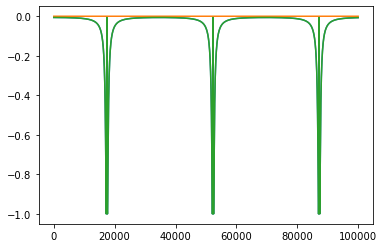

In [168]:
plt.plot(TE_1)
plt.plot(KE_1)
plt.plot(PE_1)

In [ ]:
#calculate interactions force pbc -- done
#calculate potential energy
#calculate kinetic energy plot
#calculate total energy
#vary the timesteps (different algorithms)
#neighbouring scheme (see lecture today)

# Increasing particles verlocity verlet, with Pair list

In [317]:
dist_atoms_0, PE_0, KE_0, TE_0, NL_0=main(2) # 1st simulation at N = 10, VV, Densitiy = 10/L**3 = 1.25, L=2

100%|██████████| 100/100 [00:00<00:00, 183.57it/s]


In [331]:
print(NL_0)

[list([1, 9]) list([0, 9]) list([7]) list([]) list([]) list([]) list([])
 list([2]) list([1]) list([0, 1])]


<ipython-input-331-db0665297268>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array(NL_0))


In [343]:
dist_atoms_1, PE_1, KE_1, TE_1, NL_1=main(2) # 2nd simulation at N = 20, vol = 20/1.25 = 16, L =cube root of vol(16) = 

100%|██████████| 100/100 [00:38<00:00,  2.61it/s]


In [332]:
print(NL_1)

[list([1, 8, 9, 12, 13, 14, 16, 17, 19])
 list([0, 7, 9, 11, 14, 16, 17, 19]) list([5, 6, 10, 13]) list([11, 18])
 list([]) list([9, 10, 11]) list([2, 5, 10])
 list([1, 8, 9, 11, 12, 14, 16, 17, 19])
 list([0, 7, 9, 11, 12, 13, 14, 16, 17, 19])
 list([0, 1, 5, 7, 8, 11, 12, 13, 14, 16, 17, 19]) list([5])
 list([1, 3, 5, 7, 8, 9, 12, 14, 16])
 list([0, 7, 8, 9, 11, 13, 14, 16, 17, 19])
 list([0, 2, 8, 9, 10, 12, 14, 16, 17, 19])
 list([0, 1, 7, 8, 9, 11, 12, 13, 16, 17, 19]) list([])
 list([0, 1, 7, 8, 9, 11, 12, 13, 14, 17, 19])
 list([0, 1, 7, 8, 9, 12, 13, 14, 16, 19]) list([3])
 list([0, 1, 7, 8, 9, 12, 13, 14, 16, 17])]


<ipython-input-332-196c247b56cf>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array(NL_1))


In [344]:
dist_atoms_2, PE_2, KE_2, TE_2, NL_2=main(2) # 3rd simulation at N = 100, vol = 100/1.25 = 80, L =cube root of vol(80) = 

100%|██████████| 100/100 [00:38<00:00,  2.63it/s]


In [345]:
print(NL_2)

[[2, 13, 46, 58, 74, 81, 82, 89], [47, 74, 84, 89, 98], [0, 45, 47, 74, 81, 84], [19, 33, 40, 50, 52, 53, 77, 83, 99], [9, 11, 36, 56, 60, 69, 85, 99], [10, 23, 34, 44, 45, 70, 74, 79, 81, 91, 95], [], [10, 17, 18, 22, 45, 51, 57, 66, 67, 70, 72, 75], [48, 71, 97], [4, 11, 25, 41, 52, 65, 77, 85, 94, 99], [5, 7, 17, 20, 22, 33, 45, 54, 61, 64, 70, 72, 75, 79, 95], [4, 9, 25, 36, 52, 56, 65, 69, 85, 93, 94], [], [0, 24, 44, 46, 48, 58, 71, 81, 82, 87, 89, 97], [30, 31, 38, 76, 93], [24, 42, 44, 48, 63, 65, 86, 93, 94], [], [7, 10, 22, 57, 70, 72], [7, 22, 32, 62, 66, 70, 72, 75, 98], [3, 50, 51, 53, 60, 83, 99], [10, 23, 39, 43, 54, 61, 64, 68, 79, 95], [28, 29, 37, 41, 86, 88], [7, 10, 17, 18, 45, 47, 70, 98], [5, 20, 34, 39, 54, 61, 68, 79, 91, 95], [13, 15, 42, 44, 46, 48, 58, 63, 71, 79, 81, 87, 91], [9, 11, 33, 37, 40, 44, 50, 52, 63, 65, 85, 94], [], [], [21, 29, 41, 86], [21, 28, 37, 41, 86, 88], [14, 38, 59, 65, 76, 93, 94], [14, 38, 49, 55, 67, 78, 80, 92, 93], [18, 62, 66], [3

In [98]:
dist_atoms_3, PE_3, KE_3, TE_3, NL_3=main(2) # 4th simulation at N = 300, vol = 300/1.25 = 240, L =cube root of vol(240) = 

  0%|          | 0/100 [00:00<?, ?it/s]

In [100]:
np.shape(NL_3)

/home/darrenyeo/python/python/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


(300,)

In [127]:
dist_atoms_4, PE_4, KE_4, TE_4, NL_4=main(2) # 5th simulation at N = 200, vol = 200/1.25 = 160, L =cube root of vol(160) = 

  0%|          | 0/100 [00:00<?, ?it/s]

In [130]:
print(NL_4)

[[34, 44, 60, 65, 71, 74, 75, 130, 154, 156, 177, 178, 188], [7, 18, 67, 77, 82, 101, 111, 160], [19, 23, 30, 72, 76, 110, 127], [], [34, 44, 58, 74, 83, 92, 104, 129, 144, 154, 171, 178, 184], [21, 61, 64, 109, 115, 132, 133, 143, 153, 166, 182], [91, 95, 97, 176, 179, 194], [1, 12, 26, 42, 67, 88, 101, 116, 146, 168], [45, 46, 55, 91, 117, 137, 161, 176, 190, 197], [36, 48, 60, 61, 65, 81, 83, 85, 130, 151, 156, 185], [27, 32, 41, 50, 63, 78, 93, 94, 108, 128, 174, 175, 186, 198], [102, 114, 187], [7, 22, 42, 45, 67, 88, 91, 97, 116, 141, 168, 176], [51, 54, 96, 125, 138, 139, 171], [20, 29, 84], [36, 52, 84, 109, 143, 146, 147, 151], [195], [27, 41, 49, 94, 174, 175, 186], [1, 67, 77, 82, 111, 160], [2, 23, 30, 50, 72, 76, 108, 110, 113, 127], [14, 25, 29, 84, 161, 181], [5, 52, 69, 115, 143, 147, 182], [12, 59, 81, 88, 116, 142, 162, 170, 176, 179, 194], [2, 19, 30, 72, 76], [], [20, 29, 46, 55, 120, 122, 137, 152, 161], [7, 36, 52, 69, 88, 142, 146, 147, 168, 169, 170], [10, 17, 3

In [117]:
dist_atoms_5, PE_5, KE_5, TE_5, NL_5=main(2) # 6th simulation at N = 500, vol = 500/1.25 = 400, L =cube root of vol(400) = 

  0%|          | 0/100 [00:00<?, ?it/s]

In [131]:
print(NL_5)

[[86, 247], [63, 211, 288, 306, 462], [65, 112, 200, 201, 233, 273, 364, 384, 409, 445, 470], [89, 112, 203, 425, 481], [52, 137, 154, 159, 186, 244, 451], [], [37, 71, 192, 316], [72, 84, 155, 169, 199, 382, 442], [98, 105, 170, 227, 258, 407], [11, 24, 43, 54, 112, 125, 200, 236, 273, 352, 355, 412, 470, 489], [196, 231, 252, 274, 348, 353, 460, 465, 483], [9, 33, 38, 43, 44, 131, 187, 228, 236, 273, 355, 364, 489], [30, 103, 147, 252, 348, 455, 460], [41, 86, 183, 292, 305, 331, 370, 454], [53, 145, 181, 223, 302, 354, 420], [144, 152, 189, 208, 268, 284, 326], [39, 272, 372, 388, 453], [190, 255, 360, 374], [109, 394], [77, 173, 323, 387, 428, 487], [42, 161, 165, 178, 191, 303, 333, 448, 473, 482], [29, 107, 137, 173, 256, 312, 335, 380, 469, 477, 486, 487], [85, 290, 308, 342, 378, 395, 430, 436, 437], [], [9, 94, 125, 188, 205, 489, 498], [40, 58, 126, 162, 281, 315, 317, 320, 366, 397, 445], [33, 38, 68, 81, 323, 373, 387, 400, 486, 487], [243, 309, 343, 356, 452], [182, 267, 4

In [80]:
dist_atoms_6, PE_6, KE_6, TE_6, NL_6=main(2) # 7th simulation at N = 700, vol = 700/1.25 = 560, L =cube root of vol(560) = 

KeyboardInterrupt: 

In [74]:
dist_atoms_7, PE_7, KE_7, TE_7, NL_7=main(2)# 8th simulation at N = 1000, vol = 1000/1.25 = 800, L =cube root of vol(800) = 

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Increasing particles verlocity verlet, without pair list VV

In [34]:
dist_atoms_0_nolist0, PE_0_nolist0, KE_0_nolist0, TE_0_nolist0=main(2) # 1st simulation at N = 10, VV, Densitiy = 10/L**3 = 1.25, L=2

  0%|          | 0/100 [00:00<?, ?it/s]

In [37]:
dist_atoms_1_nolist1, PE_1_nolist1, KE_1_nolist1, TE_1_nolist1,=main(2) # 2nd simulation at N = 20, vol = 20/1.25 = 16, L =cube root of vol(16) = 

  0%|          | 0/100 [00:00<?, ?it/s]

In [41]:
dist_atoms_2_nolist2, PE_2_nolist2, KE_2_nolist2, TE_2_nolist2,=main(2) # 3rd simulation at N = 100, vol = 100/1.25 = 80, L =cube root of vol(80) = 

  0%|          | 0/100 [00:00<?, ?it/s]

In [47]:
dist_atoms_3_nolist3, PE_3_nolist3, KE_3_nolist3, TE_3_nolist3,=main(2) # 4th simulation at N = 200, vol = 200/1.25 = 160, L =cube root of vol(160) = 

  0%|          | 0/100 [00:00<?, ?it/s]

In [50]:
dist_atoms_4_nolist4, PE_4_nolist4, KE_4_nolist4, TE_4_nolist4,=main(2)# 5th simulation at N = 300, vol = 300/1.25 = 240, L =cube root of vol(240) = 

  0%|          | 0/100 [00:00<?, ?it/s]

In [56]:
dist_atoms_5_nolist5, PE_5_nolist5, KE_5_nolist5, TE_5_nolist5,=main(2)# 6th simulation at N = 500, vol = 500/1.25 = 400, L =cube root of vol(400) = 

  0%|          | 0/100 [00:00<?, ?it/s]

In [63]:
dist_atoms_6_nolist6, PE_6_nolist6, KE_6_nolist6, TE_6_nolist6,=main(2)# 7th simulation at N = 700, vol = 700/1.25 = 560, L =cube root of vol(560) = 

  0%|          | 0/100 [00:00<?, ?it/s]

In [69]:
dist_atoms_7_nolist7, PE_7_nolist7, KE_7_nolist7, TE_7_nolist7,=main(2)# 8th simulation at N = 1000, vol = 1000/1.25 = 800, L =cube root of vol(800) = 

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Leapfrog scaling, increasing particles

In [185]:
LF_dist_atoms_0, LF_PE_0, LF_KE_0, LF_TE_0, LF_NL_0=main(3) # 1st simulation at N = 10, LF, Densitiy = 10/L**3 = 1.25, L=2

  0%|          | 0/100 [00:00<?, ?it/s]

In [186]:
LF_NL_0

[[8], [8], [1, 9], [], [1, 6, 9], [], [7], [6, 8, 9], [0, 1, 7], [2, 4, 7]]

In [193]:
LF_dist_atoms_1, LF_PE_1, LF_KE_1, LF_TE_1, LF_NL_1=main(3) # 2st simulation at N = 20, LF, vol = 20/1.25 = 16, L=cube root of vol(16)

  0%|          | 0/100 [00:00<?, ?it/s]

In [194]:
LF_NL_1

[[1, 3, 8, 11, 14, 15, 16, 17],
 [0, 2, 3, 8, 11, 15, 16],
 [1, 3, 4, 6, 8, 9, 11, 14, 15, 16, 18],
 [0, 1, 2, 4, 6, 8, 9, 11, 14, 16, 17, 18],
 [2, 3, 6, 8, 9, 14, 16, 18],
 [],
 [2, 3, 4, 9, 14, 16],
 [15],
 [0, 1, 2, 3, 4, 9, 14, 16, 17, 19],
 [2, 3, 4, 6, 8, 14, 16, 17, 19],
 [7, 12, 17, 19],
 [0, 1, 2, 3, 15, 16, 18],
 [10, 14, 17, 19],
 [],
 [0, 2, 3, 4, 6, 8, 9, 12, 16, 17],
 [0, 1, 2, 7, 11, 18],
 [0, 1, 2, 3, 4, 6, 8, 9, 11, 14, 17, 18, 19],
 [0, 3, 8, 9, 10, 12, 14, 16],
 [2, 3, 4, 11, 15, 16],
 [8, 9, 10, 12, 15, 16]]

In [91]:
LF_dist_atoms_2, LF_PE_2, LF_KE_2, LF_TE_2, LF_NL_2=main(3) # 3st simulation at N = 100, LF, vol = 100/1.25 = 80, L=cube root of vol(80)

In [201]:
print(LF_NL_2)

[[55], [2, 3, 11, 20, 21, 22, 23, 27, 29, 31, 40, 41, 46, 49, 50, 53, 64, 85, 91, 95], [1, 12, 19, 27, 28, 31, 39, 40, 42, 49, 50, 53, 97], [1, 7, 16, 20, 21, 23, 29, 38, 40, 60, 64, 73, 85, 91, 95], [11, 58, 67, 74, 79], [13, 24, 25, 26, 33, 34, 36, 38, 61, 81, 98], [8, 14, 46, 51, 57, 62, 63, 77, 84, 87, 90, 94], [3, 16, 29, 36, 38, 91], [6, 18, 22, 24, 46, 51, 59, 62, 77, 81, 90, 94], [], [17, 44, 48, 60, 80, 96], [1, 4, 19, 20, 31, 41, 50, 56, 57, 58, 64, 74, 79, 84], [2, 27, 35, 37, 39, 42, 52, 53, 54, 65, 68, 97], [5, 22, 24, 25, 26, 33, 34, 36, 38, 41, 61, 71, 81, 85, 98], [6, 32, 39, 46, 51, 57, 62, 63, 68, 84, 87, 90], [34, 41, 61, 82, 84], [3, 7, 25, 29, 38, 64, 74, 91, 95], [10, 44, 48, 56, 60, 72, 74, 80, 95, 96], [8, 22, 23, 24, 27, 43, 46, 49, 59, 85, 92, 93], [2, 11, 31, 44, 48, 50, 56, 72, 80, 86, 88, 97], [1, 3, 11, 21, 23, 27, 29, 40, 48, 49, 50, 53, 64, 73, 85, 91, 95], [1, 3, 20, 23, 27, 29, 40, 47, 49, 53, 73, 85, 91, 92, 95], [1, 8, 13, 18, 23, 24, 34, 41, 46, 49,

In [206]:
LF_dist_atoms_3, LF_PE_3, LF_KE_3, LF_TE_3, LF_NL_3=main(3) # 4th simulation at N = 200, LF, vol = 200/1.25 = 160, L=cube root of vol(160)

  0%|          | 0/100 [00:00<?, ?it/s]

In [207]:
print(LF_NL_3)

[[], [8, 41, 48, 73, 101, 107, 125, 138, 152, 162, 168, 170], [27, 106, 167], [16, 24, 27, 69, 73, 80, 115, 125, 133, 144, 159, 167, 178, 192, 194, 196], [5, 58, 122, 181], [4, 37, 58, 122, 181], [11, 44, 91, 93, 97, 111, 121, 188], [70, 78, 84, 182, 190], [1, 16, 41, 69, 73, 115, 125, 138, 152, 162, 170, 192, 196], [13, 25, 62, 166], [17, 44, 91, 97, 106, 111, 154, 184], [6, 31, 45, 53, 55, 61, 82, 93, 96, 105, 120, 121, 153, 177], [14, 99, 140, 143, 150, 161, 186, 197], [9, 47, 77, 99, 119, 140, 143, 150, 155], [12, 130, 140, 145, 157, 161, 186, 193, 197], [67, 68, 75, 83, 95, 117, 169], [3, 8, 69, 73, 100, 115, 125, 162, 171, 178, 192, 194, 196], [10, 27, 57, 104, 106, 154, 170, 184], [146, 168], [42, 43, 49, 86, 163], [21, 22, 53, 60, 81, 85, 127, 141, 147, 160, 177, 187, 189], [20, 28, 43, 60, 65, 103, 127, 189], [20, 43, 60, 72, 81, 86, 116, 127, 141, 160, 172, 177, 187, 189], [62, 99, 155, 166], [3, 44, 45, 80, 97, 133, 144, 147, 153, 159, 178, 196], [9, 62, 73, 100, 152, 162, 1

In [212]:
LF_dist_atoms_4, LF_PE_4, LF_KE_4, LF_TE_4, LF_NL_4=main(3) # 5th simulation at N = 300, LF, vol = 200/1.25 = 240, L=cube root of vol(240)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
np.shape(LF_NL_4)

In [219]:
LF_dist_atoms_5, LF_PE_5, LF_KE_5, LF_TE_5, LF_NL_5=main(3) # 6th simulation at N = 500, LF, vol = 500/1.25 = 240, L=cube root of vol(400)

  0%|          | 0/100 [00:00<?, ?it/s]

In [221]:
print(LF_NL_5)

[[82, 95, 167, 190, 196, 335, 343, 395], [63, 68, 69, 85, 123, 314, 368], [16, 88, 129, 157, 159, 160, 183, 341], [6, 31, 109, 126, 235, 364, 380, 383, 477], [228, 342], [28, 172, 203, 245, 261, 360, 448, 495], [3, 31, 126, 235, 264, 312, 364, 380, 383], [21, 34, 152, 165, 192, 231, 249, 304, 393, 427], [193, 257, 259, 264, 383, 467], [67, 90, 109, 251, 317, 324, 330, 483], [24, 58, 278, 369, 498], [33, 246, 384], [110, 202, 205, 301, 391, 411, 463, 478, 493], [429], [125, 144, 397, 461], [59, 102, 187, 218, 219, 316, 365, 399, 424, 467], [2, 68, 88, 157, 159, 183, 286, 318, 456], [19, 93, 148, 175, 217, 390, 470], [238, 254, 290, 428, 437, 475], [17, 57, 114, 175, 390, 470], [82, 95, 306, 462], [7, 152, 192, 194, 393, 427, 465], [112, 195, 218, 243, 387, 460, 484], [70, 283, 371, 381], [10, 58, 71, 278, 498], [104, 150, 198, 202, 411, 415, 416, 433], [48, 147, 252, 289, 299, 402, 405, 456, 471], [32, 110, 131, 146, 173, 266, 349, 487], [5, 134, 250, 296, 448, 495], [150, 151, 198, 220

In [100]:
LF_dist_atoms_6, LF_PE_6, LF_KE_6, LF_TE_6, LF_NL_6=main(3) # 7th simulation at N = 700, LF, vol = 700/1.25 = 560, L=cube root of vol(560)

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [85]:
LF_dist_atoms_7, LF_PE_7, LF_KE_7, LF_TE_7, LF_NL_7=main(3)# 8th simulation at N = 1000, vol = 1000/1.25 = 800, L =cube root of vol(800) = 

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Leapfrog scaling, increasing particles, without Pair list

In [ ]:
# 1st simulation at N = 10, Density = 10/8 = 1.25, L = 2

In [ ]:
# 2nd simulation at N = 20, vol = 100/1.25 = 80, L =cube root of vol(16) = 

In [122]:
LF_dist_atoms_2_nolist2, LF_PE_2_nolist2, LF_KE_2_nolist2, LF_TE_2_nolist2=main(3)# 3th simulation at N = 100, vol = 100/1.25 = 80, L =cube root of vol(80) = 

  0%|          | 0/100 [00:00<?, ?it/s]

In [119]:
LF_dist_atoms_3_nolist3, LF_PE_3_nolist3, LF_KE_3_nolist3, LF_TE_3_nolist3=main(3)# 4th simulation at N = 200, vol = 200/1.25 = 160, L =cube root of vol(160) = 

  0%|          | 0/100 [00:00<?, ?it/s]

In [114]:
LF_dist_atoms_4_nolist4, LF_PE_4_nolist4, LF_KE_4_nolist4, LF_TE_4_nolist4=main(3)# 5th simulation at N = 300, vol = 300/1.25 = 240, L =cube root of vol(240) = 

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [109]:
LF_dist_atoms_5_nolist5, LF_PE_5_nolist5, LF_KE_5_nolist5, LF_TE_5_nolist5=main(3)# 6th simulation at N = 500, vol = 500/1.25 = 400, L =cube root of vol(400) = 

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
LF_dist_atoms_6_nolist6, LF_PE_6_nolist6, LF_KE_6_nolist6, LF_TE_6_nolist6=main(3)# 7th simulation at N = 700, vol = 700/1.25 = 560, L =cube root of vol(560) = 

In [97]:
LF_dist_atoms_7_nolist7, LF_PE_7_nolist7, LF_KE_7_nolist7, LF_TE_7_nolist7=main(3)# 8th simulation at N = 1000, vol = 1000/1.25 = 800, L =cube root of vol(800) = 

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

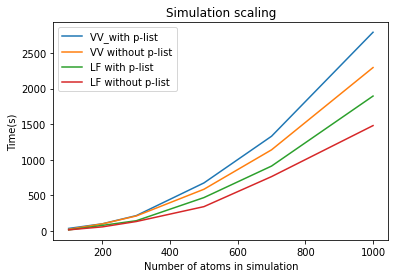

In [132]:
#Scaling of LF and VV with pair list
VV_P = [36, 101, 216, 675, 1331, 2791] #VV with pair list
VV_noP=[24, 100, 211, 586, 1140, 2295]
LF_P =[15, 79, 144, 469, 912, 1895] #LF with pair list
LF_noP=[16, 58, 133, 342, 764, 1480]

N= [100, 200, 300, 500, 700, 1000]
plt.xlabel('Number of atoms in simulation')
plt.ylabel('Time(s)')
plt.title('Simulation scaling')

plt.plot(N, VV_P, label = "VV_with p-list")
plt.plot(N, VV_noP, label= "VV without p-list")
plt.plot(N, LF_P, label = "LF with p-list")
plt.plot(N, LF_noP, label = "LF without p-list")
plt.legend()
plt.show()

# VV Scaling of timestep (dt) at N =100, L= cube root of volume (80)

In [98]:
dist2_atoms_1, PE2_1, KE2_1, TE2_1, NL2_1 = main(2) #1st sim, dt = 10**-3

  0%|          | 0/100 [00:00<?, ?it/s]

In [106]:
print(NL2_1)

[[2], [], [0], [18, 39, 51, 53, 89], [14, 22, 31, 35, 96], [9, 15, 18, 21, 24, 34, 39, 40, 41, 53, 60, 65, 68, 72, 88], [8, 14, 27, 28, 37, 58, 70], [87], [6, 58, 59], [5, 15, 18, 19, 21, 27, 39, 40, 41, 60, 65, 68, 70, 72, 84, 88], [82], [36, 59], [93], [], [4, 6, 28, 37, 39, 41, 70], [5, 9, 19, 21, 40, 68, 72, 88], [34, 36, 39, 41, 53, 60, 65, 80, 89], [], [3, 5, 9, 39, 40, 41, 46, 51, 53, 60, 65, 70, 72, 88], [9, 15, 21, 26, 68, 70, 72, 84, 88], [], [5, 9, 15, 19, 40, 68, 72, 84, 88], [4, 31, 35], [], [5, 34, 40, 65, 87], [79], [19, 30, 46, 52, 66, 70, 72, 94], [6, 9, 37, 70, 84], [6, 14, 58, 70], [], [26, 52, 66, 70, 94], [4, 22, 35], [], [49], [5, 16, 24, 40, 53, 65, 87, 88], [4, 22, 31, 96], [11, 16, 37, 80], [6, 14, 27, 36, 41, 60, 70, 80], [12, 57, 74], [3, 5, 9, 14, 16, 18, 40, 41, 46, 53, 60, 65, 66, 70, 72, 80, 88, 89, 94], [5, 9, 15, 18, 21, 24, 34, 39, 41, 60, 65, 68, 72, 88], [5, 9, 14, 16, 18, 37, 39, 40, 53, 60, 65, 70, 80, 88, 89], [66, 77, 87, 94, 97], [53, 80, 89], [

In [104]:
dist2_atoms_2, PE2_2, KE2_2, TE2_2, NL2_2 = main(2) #2nd sim, dt = 10**-4

  0%|          | 0/100 [00:00<?, ?it/s]

In [105]:
print(NL2_2)

[[1, 4, 6, 8, 9, 11, 14, 16, 17, 22, 23, 32, 34, 35, 38, 50, 52, 53, 54, 56, 57, 62, 66, 67, 69, 75, 77, 79, 82, 83, 85, 89, 90, 91, 92, 93, 96, 97, 98, 99], [0, 11, 16, 17, 22, 24, 32, 35, 56, 66, 67, 69, 75, 79, 82, 83, 88, 89, 92, 93, 97, 98], [], [], [0, 5, 6, 7, 8, 9, 11, 12, 13, 17, 20, 23, 25, 27, 36, 40, 42, 47, 52, 54, 62, 63, 74, 83, 91, 96, 98, 99], [4, 7, 9, 11, 24, 25, 31, 35, 36, 42, 62, 63, 74, 79, 83, 89, 90, 91, 96, 98, 99], [0, 4, 7, 8, 9, 11, 13, 14, 16, 17, 23, 27, 32, 34, 35, 38, 50, 52, 53, 54, 56, 57, 58, 62, 69, 74, 75, 77, 82, 83, 85, 89, 90, 91, 96, 97, 98, 99], [4, 5, 6, 8, 9, 11, 13, 20, 23, 25, 36, 37, 42, 62, 63, 74, 79, 83, 89, 90, 91, 96, 98, 99], [0, 4, 6, 7, 9, 11, 13, 14, 23, 38, 50, 52, 53, 57, 58, 62, 68, 85, 90, 91, 96, 99], [0, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 23, 24, 25, 35, 36, 42, 52, 54, 56, 62, 63, 67, 74, 75, 77, 79, 83, 89, 90, 91, 96, 97, 98, 99], [78], [0, 1, 4, 5, 6, 7, 8, 9, 12, 13, 14, 16, 17, 22, 23, 24, 27, 32, 34, 35, 36, 42, 50, 

In [112]:
dist2_atoms_3, PE2_3, KE2_3, TE2_3, NL2_3 = main(2) #3rd sim, dt = 10**-7

  0%|          | 0/100 [00:00<?, ?it/s]

In [114]:
print(NL2_3)

[[1, 2, 6, 7, 18, 22, 24, 35, 42, 43, 46, 48, 57, 58, 59, 62, 63, 65, 68, 80, 82, 89, 91], [0, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 17, 18, 20, 22, 23, 24, 25, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 60, 62, 63, 64, 65, 68, 69, 71, 72, 74, 75, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 91, 92, 93, 94, 95, 96, 99], [0, 1, 6, 7, 8, 9, 13, 18, 20, 21, 24, 25, 32, 33, 35, 36, 42, 46, 53, 57, 58, 65, 68, 69, 82, 89, 95, 96, 99], [1, 4, 5, 10, 14, 15, 16, 17, 20, 22, 23, 27, 29, 31, 33, 34, 37, 39, 45, 47, 50, 51, 52, 54, 56, 60, 61, 62, 64, 70, 72, 74, 76, 78, 79, 83, 85, 91, 92, 94], [1, 3, 5, 9, 10, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 37, 38, 39, 44, 45, 47, 49, 50, 51, 52, 53, 54, 56, 58, 59, 60, 61, 62, 64, 68, 70, 72, 74, 76, 77, 78, 79, 81, 83, 85, 86, 87, 88, 91, 92, 94, 95], [1, 3, 4, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41,

# Number of steps = 10000

In [136]:
dist2_atoms_4, PE2_4, KE2_4, TE2_4, NL2_4 = main(2) #4th sim, N=100,L=cube root of vol(80), dt = 10**-3

  0%|          | 0/10000 [00:00<?, ?it/s]

In [142]:
dist2_atoms_5, PE2_5, KE2_5, TE2_5, NL2_5 = main(2) #5th sim, N=100, L=cube root of vol(80), dt = 10**-5

  0%|          | 0/10000 [00:00<?, ?it/s]

<ipython-input-47-c30673ba5be2>:13: RuntimeWarning: divide by zero encountered in double_scalars
  force[i,k] += 24*(epsilon/sigma)*(2*((sigma/(absolute_r))**13)-(sigma/(absolute_r))**7)*r_vector[k]/absolute_r#compute force to each particle
<ipython-input-47-c30673ba5be2>:13: RuntimeWarning: invalid value encountered in double_scalars
  force[i,k] += 24*(epsilon/sigma)*(2*((sigma/(absolute_r))**13)-(sigma/(absolute_r))**7)*r_vector[k]/absolute_r#compute force to each particle


In [55]:
dist2_atoms_6, PE2_6, KE2_6, TE2_6, NL2_6 = main(3) #6th sim, N=100, L=cube root of vol(80), dt = 10**-3, LF

<ipython-input-36-c30673ba5be2>:13: RuntimeWarning: divide by zero encountered in double_scalars
  force[i,k] += 24*(epsilon/sigma)*(2*((sigma/(absolute_r))**13)-(sigma/(absolute_r))**7)*r_vector[k]/absolute_r#compute force to each particle
<ipython-input-36-c30673ba5be2>:13: RuntimeWarning: invalid value encountered in double_scalars
  force[i,k] += 24*(epsilon/sigma)*(2*((sigma/(absolute_r))**13)-(sigma/(absolute_r))**7)*r_vector[k]/absolute_r#compute force to each particle


In [48]:
dist2_atoms_7, PE2_7, KE2_7, TE2_7, NL2_7 = main(3) #7th sim, dt = 10**-5, LF

  0%|          | 0/10000 [00:00<?, ?it/s]

In [47]:
PE2_7

NameError: name 'PE2_7' is not defined